<a href="https://colab.research.google.com/github/sanat259/CS-BigData/blob/master/tensorflow_Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

import tensorflow as tf


In [ ]:
import tensorflow as tf
import pandas as pd

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import metrics

In [ ]:
df = pd.read_csv("/content/Concrete_Data.csv")
df.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [ ]:
m = MinMaxScaler()
X_scaled = m.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264


In [ ]:
X_scaled.shape

(1030, 8)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2019)

In [ ]:
(X_train.shape, y_train.shape)

((721, 8), (721,))

In [ ]:
import numpy as np
tf.random.set_seed(2020)

In [ ]:
model = Sequential([
   tf.keras.layers.Dense(10, input_dim=X_train.shape[1], activation='relu'),
   tf.keras.layers.Dense(8,  activation='relu'),
   tf.keras.layers.Dense(5,  activation='relu'),
   tf.keras.layers.Dense(3,  activation='relu'),
   tf.keras.layers.Dense(1, activation='relu')
])

In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=2, mode='auto',
        restore_best_weights=True)

history  = model.fit(X_train.values, y_train.values,
          epochs=200, verbose=2, 
          callbacks=[monitor],
          validation_data=(X_test.values, y_test.values))

Epoch 1/200
23/23 - 1s - loss: 845.7314 - mae: 24.1568 - val_loss: 569.0028 - val_mae: 18.6952
Epoch 2/200
23/23 - 0s - loss: 351.1325 - mae: 14.9452 - val_loss: 349.8723 - val_mae: 15.1779
Epoch 3/200
23/23 - 0s - loss: 312.0179 - mae: 14.2441 - val_loss: 342.0555 - val_mae: 15.1014
Epoch 4/200
23/23 - 0s - loss: 309.3217 - mae: 14.2579 - val_loss: 334.1847 - val_mae: 14.7323
Epoch 5/200
23/23 - 0s - loss: 293.1588 - mae: 13.8380 - val_loss: 330.2091 - val_mae: 14.4926
Epoch 6/200
23/23 - 0s - loss: 286.7727 - mae: 13.6754 - val_loss: 317.1657 - val_mae: 14.2654
Epoch 7/200
23/23 - 0s - loss: 278.4989 - mae: 13.4724 - val_loss: 311.8123 - val_mae: 14.0101
Epoch 8/200
23/23 - 0s - loss: 268.9243 - mae: 13.2416 - val_loss: 281.0864 - val_mae: 13.4619
Epoch 9/200
23/23 - 0s - loss: 236.8383 - mae: 12.3080 - val_loss: 224.5872 - val_mae: 12.0319
Epoch 10/200
23/23 - 0s - loss: 207.7992 - mae: 11.5486 - val_loss: 254.8509 - val_mae: 12.4975
Epoch 11/200
23/23 - 0s - loss: 204.1948 - mae: 1

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_ = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_))
print(f"RMSE: {RMSE}")

RMSE: 7.183859602358856


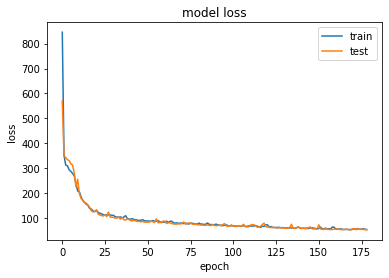

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()